# Lesson 5 Assignment - Auto Hypotheses 

## Author - Emily McAfee



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import scipy.stats as ss
import warnings
warnings.filterwarnings
('ignore')
from matplotlib import pyplot
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Read in the data

# Cleaned up dataset location
filename = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Put into dataframe
autodf = pd.read_csv(filename)

In [3]:
# Check data
print(autodf.head())
autodf.dtypes

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# 1. Identify a likely distribution for price and several other features.

## Price

In [4]:
# Check data

# Check price data
autodf.loc[:,'price'].head()

# Check for missing data
autodf.price.unique()

# Replace missing data with median
def fill_median(datacol):
    
    #identify numeric values
    numval = (datacol != " ") & (datacol != "?") & (datacol != "??") & (datacol != "NA")
    
    #identify non-numeric values
    nonnumval = ~numval
    
    #replace non-numeric values with median
    datacol[nonnumval] = np.median(datacol[numval].astype('float'))
    datacol = datacol.astype('float')
    
    return(datacol)

# Replace column with new median-replaced column
autodf.loc[:,'price'] = fill_median(autodf.loc[:,'price'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
# Check to see that column is now numeric/not containing '?'
print(autodf.dtypes)
print(autodf.loc[:,'price'].head())
print(autodf.price.unique())

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
[13495. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 10295. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  657

Text(0, 0.5, 'Frequency')

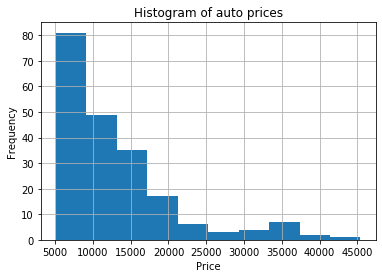

In [6]:
# Plot price
autodf.loc[:,'price'].hist()
plt.title('Histogram of auto prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [7]:
# Statistical normal test
stats.normaltest(autodf.loc[:,'price'])

NormaltestResult(statistic=81.8229178484423, pvalue=1.707572463071694e-18)

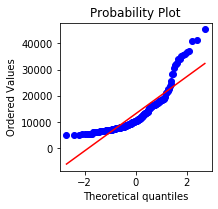

In [8]:
# Normal test visualization
def qq_plot(vec1):
    
    #define axis
    plt.figure(figsize=(6, 6)).gca()
    
    #set up plot
    ax1 = plt.subplot(221) ## setup the left subplot
    
    #plot
    ss.probplot(vec1, plot = ax1)
    
# Generate qq plot of price data
qq_plot(autodf.loc[:,'price'])

#stats.probplot(autodf.loc[:,'price'], plot=plt)

### Price interpretations
When looking at the distribution of prices in histogram form, we see a right skew of our data, with the bulk of it near the 5000 range. This implies a non-normal distribution. To test this, we ran a staitstical normal test and found that, with an alpha of .05, our distribution does not appear to to be normal. However, just to get a full view of our data, we want to visualizae it a different way, on a QQ plot. From the QQ plot we can see that the data do have a tendency towards normal, but sway too dramatically in the tails to be considered so.

## Engine size

In [9]:
# Check data
print(autodf.loc[:,'engine-size'].head())

# Check for missing data
autodf.loc[:,'engine-size'].unique() #doesn't look like any is missing

0    130
1    130
2    152
3    109
4    136
Name: engine-size, dtype: int64


array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

Text(0, 0.5, 'Frequency')

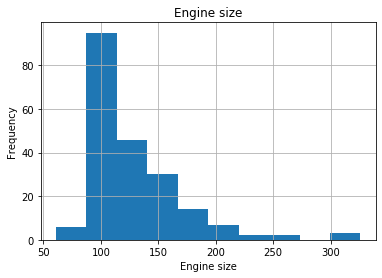

In [10]:
# Plot engine-size
autodf.loc[:,'engine-size'].hist()
plt.title('Engine size')
plt.xlabel('Engine size')
plt.ylabel('Frequency')

In [11]:
# Statistical normal test
stats.normaltest(autodf.loc[:,'engine-size'])

NormaltestResult(statistic=95.91743381072065, pvalue=1.4852306016639641e-21)

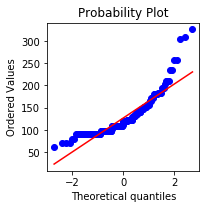

In [12]:
# Normal test visualization
qq_plot(autodf.loc[:,'engine-size'])

## Engine Size interpretations
When looking at the engine size data we can see a slight skew to the right, with most of the data being around 100. This observation is particularly interesting because the shape and spread appears very similar to our price data. When taking a closer look with a statistical test of normality, we find that the distribution of engine sizes is not normal. Ths finding is further solidified when observing the qq-plot above. Again, we see similarities in the shape of this qq-plot to the price feature qq-plot. Observing similarities between features is important because it implies that these two variables have a very strong relationship, possibly helping our automobile auction client to price cars when only one or some of the features are known

## Length

In [13]:
# Check data
autodf.length.head()

# Check for missing data
autodf.length.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

Text(0, 0.5, 'Frequency')

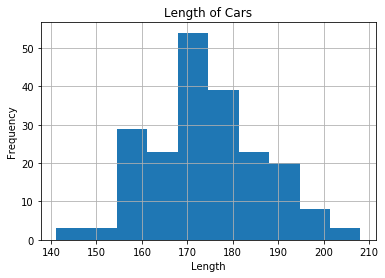

In [14]:
# Plot length
autodf.length.hist()
plt.title('Length of Cars')
plt.xlabel('Length')
plt.ylabel('Frequency')

In [15]:
# Statistical test for normality
stats.normaltest(autodf.length)

NormaltestResult(statistic=0.8791618394350731, pvalue=0.6443063806118123)

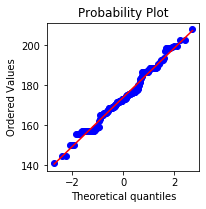

In [16]:
# Q-Q plot
qq_plot(autodf.length)

## Length interpretations
Given the similarities between price and engine size, I chose to explore length because I wanted to ensure my representations were varying ppropriately across my features. I had an inclination length was not skewed due to the nature of the variable, and that hypothesis appears to have been correct. Histogram and QQ-plot visualizatiosn paired with statistical tests of normality demonstrate that the variable is normally distributed.

# 2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods

## Price
### Classical

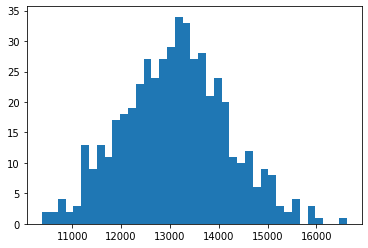

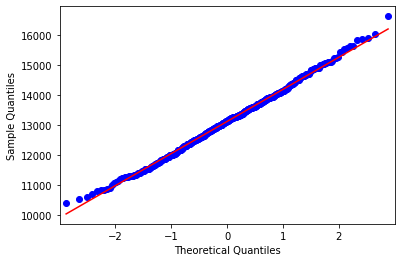

In [17]:
# Sample the distributions
pricecol = autodf.price

# Gather sample data
pricecol_means = np.array([
    np.random.choice(pricecol, size = 50, replace = True).mean()
    for i in range(500)
])

# Create histogram
breaks = np.linspace(pricecol_means.min(), pricecol_means.max(), num = 40)

# Create QQ-plot
_ = pyplot.hist(pricecol_means, bins = breaks)
_ = sm.qqplot(pricecol_means, line = 's')

In [18]:
# Compute summary statistics
# Compute sample estimated population stats
price_pop_mean = pricecol_means.mean()
price_pop_std = pricecol_means.std()

# Compute and display sample estimated and actual
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (price_pop_mean, pricecol.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (price_pop_std, pricecol.std()))

Estimated mean (13113.340) vs actual mean (13150.307)
Estimated s.d. (1069.279) vs actual s.d. (7879.121)


### Bootstrap

Bootstrapped means of price = (13139.217)
Actual mean of price = (13150.307)


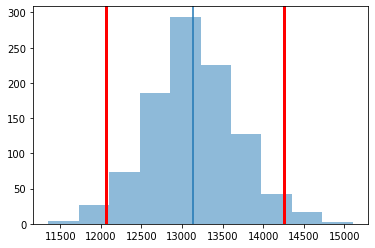

In [19]:
## Bootstrap the means of the price feature ##pricecol

# Establish how many bootstrap samples you will be using
n_replicas = 1000

# Bootstrap the means of price
price_bootstrap_means = pd.Series([
    pricecol.sample(frac = 1, replace = True).mean()
    for i in range(n_replicas)])

# Create function to plot bootstrap sample means
def plot_hist(x, p = 5):
    
    # plot the distribution and mark the mean
    pyplot.hist(x, alpha = .5)
    pyplot.axvline(x.mean())
    
    # mark the 95% ci
    pyplot.axvline(np.percentile(x, p/2.), color = 'red', linewidth = 3)
    pyplot.axvline(np.percentile(x, 100 - p/2.), color = 'red', linewidth = 3)

# Plot bootstrapped price means
plot_hist(price_bootstrap_means)
pbs_mean = price_bootstrap_means.mean()
print('Bootstrapped means of price = (%.3f)' % (price_bootstrap_means.mean()))
print('Actual mean of price = (%.3f)' % (pricecol.mean()))

### Bayesian

In [20]:
# Add column indicating whether a car is above 18000 - comparatively expensive
autodf2 = autodf
autodf2['exp'] = np.where(autodf2['price'] >= 18000, 1, 0)

# Check new data
autodf2.head()
sum(autodf2.exp)

36

In [21]:
# Gather basic stats

# Sample size
N = len(autodf2.exp)

# Number of expensive cars
n_expensive = sum(autodf2.exp)

# Number of not expensive cars
n_not = N - n_expensive

# Print price info
print('Expensive cars = %d Not expensive cars = %d' '\nProbability of car being expensive = %.1f'
     %(n_expensive, n_not, n_expensive / (n_expensive + n_not)))

Expensive cars = 36 Not expensive cars = 169
Probability of car being expensive = 0.2


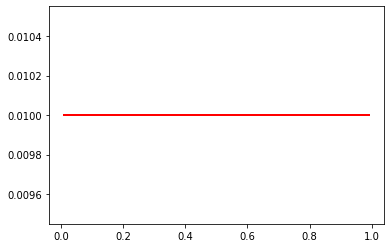

In [22]:
# Test a prior distribution on one model parameter (uniform distribution)
# Compute and plot uniform prior distribution
N = 100
p = np.linspace(.01, .99, num = N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth = 2, color = 'red')


Text(0, 0.5, 'Likelihood')

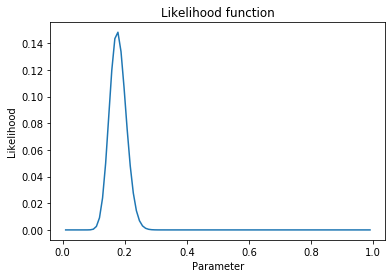

In [23]:
# Compute and plot the binomial likelihood for price data
def likelihood (p, data):
    k = sum(data)
    N = len(data)
    
    # Compute binomial likelihood
    bi_l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    
    # Normalize the likelihood to sum to unity
    return bi_l/sum(bi_l)

binomial_likelihood = likelihood(p, autodf2.exp)
pyplot.plot(p, binomial_likelihood)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')
# %debug

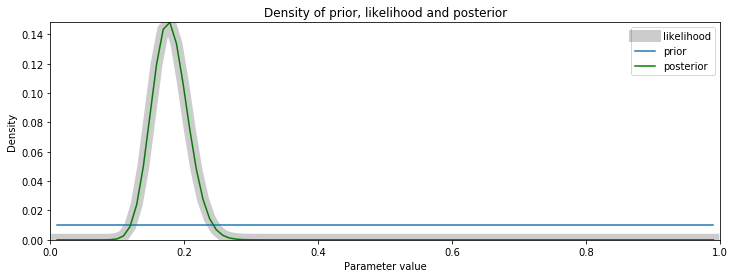

In [24]:
# Compute the posterior distribution of the parameter using the prior and likelihood

# Make function to find posterior
def posterior(prior, like):
    
    # Multiply the probabilities
    post = prior * like
    
    # Normalize the distribution
    return post/sum(post)

# Function to plot the prior, likelihood, and posterior
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()


# Find posterior using function above
post = posterior(pp, binomial_likelihood)

# Plot all
plot_post(pp, binomial_likelihood, post, p)

## Summary statistics interpretation
When getting summary statistics of price through classical methods, we see that a normal distribution of the sample means begins to emerge. This normal distribution is also seen in the Q-Q plot. This interesting pattern of the sample means can also be seen in the summary statistics gleaned from bootstrapping. We not only see a normal distribution begin to emerge, but we see that the sample mean is almost exactly what the actual mean is. This can be very useful, as it implies that if the auction client wants to predict average automobile prices for a certain year, they can make due with a relatively small subset of data. Our bayesian analysis shows us that our posterior is just like our likelihood gleaned from our prior. This demonstrates how frequentist probablities are identical to the Bayesian posterior distribution given a uniform prior (which is what we used here).

# 3. Compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods


## Price

### Classical

In [25]:
# Compute confidence intervals for a normal distribution
# Set alpha
alpha = 0.95

# Define margin of error
half_width = scipy.stats.norm.ppf((1 + alpha) /2, loc = price_pop_mean, scale = price_pop_std) - price_pop_mean

# Print margin of error
print('The half width is %.2f' % half_width)

# Set limits for confidence intervals
ci_low = price_pop_mean - half_width
ci_high = price_pop_mean + half_width

# Print info
print('The actual mean is %.2f' %pricecol.mean())
print('The %.2f level CI is (%.2f, %.2f)' % (alpha, ci_low, ci_high))

The half width is 2095.75
The actual mean is 13150.31
The 0.95 level CI is (11017.59, 15209.09)


### Bootstrap

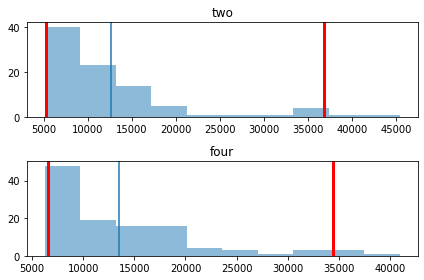

In [26]:
# Check data
autodf3 = autodf
autodf3.loc[:,'num-of-doors'] = autodf3.loc[:,'num-of-doors'].replace('?','two')

# Select subset of rows
two = autodf3[autodf3.loc[:,'num-of-doors'] == 'two']
four = autodf3[autodf3.loc[:,'num-of-doors'] == 'four']

# Make function to plot both
def plot_dists(a, b, nbins, a_label = 'pop_A', b_label='pop_B', p = 5):
    
    # Create visualization consistency
    combined = pd.concat([a,b])
    breaks = np.linspace(
        combined.min(),
        combined.max(),
        num = nbins + 1)
    
    pyplot.subplot(2, 1, 1)
    plot_hist(a)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b)
    pyplot.title(b_label)
    
    pyplot.tight_layout()

plot_dists(two.price, four.price, 20, a_label = 'two', b_label = 'four')



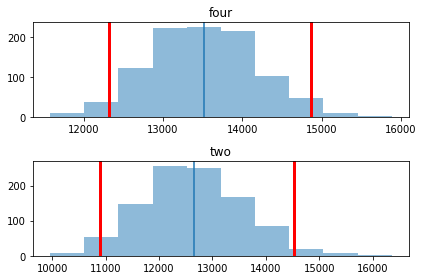

In [27]:
# Bootstrap means

# How many sample means
n_replicas = 1000

# two door bootstrap samples
two_bootstrap_means = pd.Series([
    two.sample(frac = 1, replace = True).price.mean()
    for i in range(n_replicas)])

four_bootstrap_means = pd.Series([
    four.sample(frac = 1, replace = True).price.mean()
    for i in range(n_replicas)])

plot_dists(four_bootstrap_means, two_bootstrap_means,
          nbins = 80, a_label = 'four', b_label = 'two')

## Bayesian

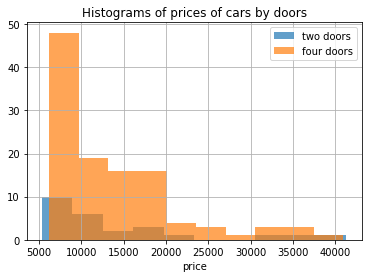

In [28]:
# Subsample autodf with 25 observations
num_sample = 25
two = autodf3[autodf3.loc[:,'num-of-doors'] == 'two'].sample(n = num_sample)

# Plot sample
pyplot.title('Histograms of prices of cars by doors')
two.price.hist(label = 'two doors', bins = 10, alpha = .7)
four.price.hist(label = 'four doors', bins = 10, alpha = .7)
pyplot.xlabel('price')
pyplot.legend()

Mean = 13940.840, Standard Deviation = 9612.237


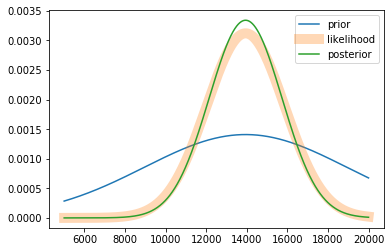

In [29]:
# Estimate the posterior distribution of the mean
N = 1000
p = np.linspace(5000, 20000, num = N)

pp = ss.norm.pdf(p, loc = two.price.mean(), scale = 5000)
pp = pp / pp.sum()

def comp_like(p, x):
    variance = np.std(x)**2
    x_mean = np.asarray(x).mean()
    print('Mean = %.3f, Standard Deviation = %.3f' % (x_mean, np.std(x)))
    n = len (x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l/l.sum()

like_two = comp_like(p, two.price)
post_two = posterior(pp, like_two)

# Plot results
pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_two, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_two, label='posterior')
pyplot.legend()

Mean = 13536.982, Standard Deviation = 7327.405


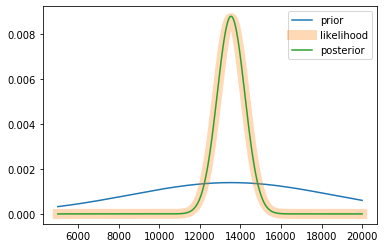

In [30]:
# Do same for prices of four door cars
pp_four = ss.norm.pdf(p, loc = four.price.mean(), scale = 5000)
pp_four = pp_four / pp_four.sum()

like_four = comp_like(p, four.price)
post_four = posterior(pp_four, like_four)

pyplot.plot(p, pp_four, label='prior')
pyplot.plot(p, like_four, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_four, label='posterior')
pyplot.legend()

The 0.950 credible interval is 0.025 to 0.975


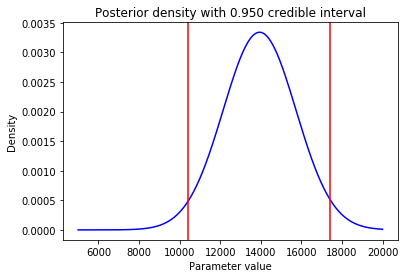

In [34]:
num_samples = 100000


# Create function to plot credible intervals
def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

# Plot credible intervals for two door
plot_ci(p, post_two, num_samples, lower_q = .025, upper_q = .975)

The 0.950 credible interval is 0.025 to 0.975


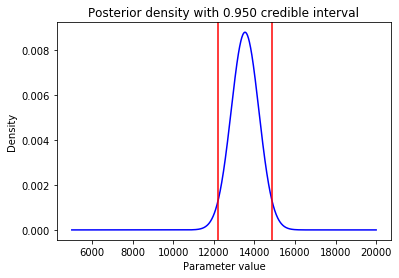

In [35]:
# Same for four door
plot_ci(p, post_four, num_samples, lower_q = .025, upper_q = .975)

# Confidence interval interpretations
When using classicla testing methods, we see that the CI for price of automobiles is about 11017 and 15209, repsectively. With an actual mean of 13150, the confidence intervals do not have a very large spread, suggesting we have a relatively stable estimate given our data. When bootstrapping to find confidence intervals of both two door and four door cars we see there is quite a bit of overlap. However, in order to properly see if there truly is a different in price between the two, we would need to do hypothesis testing (see: next section). When bootstrapping the means for these two car types we see a normal distribution that overlap a lot, that hypothesis testing will really come in handy when attemtping to discern true differences. When using bayesian representations for the posterior distribution of the mean for two door cars we see that our likelihood and our prior are very close to one another, which makes sense given our prior of a uniform distribution. When looking t four door cars, we see a similar pattern, but the distribution seems to be much more pointed. Hypothesis testing in the next section will allow us to see if these differences are enough to be significant.

# 4. Use hypothesis tests to determine if the differences in multiple populations are significant

## Price

### Classical

DegFreedom      30.192043
Difference     403.857544
Statistic        0.194195
PValue           0.847324
Low95CI      -3842.217870
High95CI      4649.932958
dtype: float64

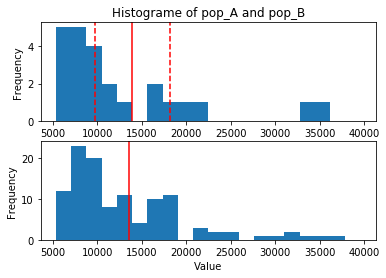

In [41]:
# Testing to see if prices in two and four door cars are 
# significantly different using t-testing

# Create basic histogram function
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
# Create function for t-test
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   

# Set alpha equal to .05/create variable with this information
pricettest = t_test(two.price, four.price, 0.05)

# Create function for delineating confidence intervals
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

# Plot t-test data
def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

print(pricettest)
plot_t(two.price, four.price, pricettest)


### Tukey's Honest Significant Differences (HSD)

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(autodf3['price'], autodf3['num-of-doors'])
mc_results = mc.tukeyhsd()
print(mc_results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  four    two -871.0814 0.4329 -3057.0014 1314.8387  False
----------------------------------------------------------


### Bootstrap methods

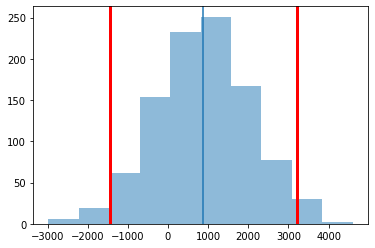

In [38]:
## Calculate the difference in means

diffs = []
for i in range(n_replicas):
    sample = autodf3.sample(frac=1.0, replace=True)
    two_sample_mean = sample[sample.loc[:,'num-of-doors'] == 'two'].price.mean()
    four_sample_mean = sample[sample.loc[:,'num-of-doors'] == 'four'].price.mean()
    diffs.append(four_sample_mean - two_sample_mean)
diffs = pd.Series(diffs)


plot_hist(diffs)

### Bayesian model

The 0.950 credible interval is 0.025 to 0.975
The 0.950 credible interval is 0.025 to 0.975


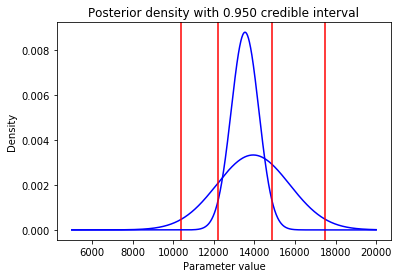

In [39]:
# Plot posterior distributions of price for two and four doors cars
plot_ci(p, post_two, num_samples, lower_q = .025, upper_q = .975)
plot_ci(p, post_four, num_samples, lower_q = .025, upper_q = .975)

# Hypothesis test interpretations
Using a classical t-test for prices between two and four door vehicles, we see that our p-value is well above our .05 threshold. This statistic is further demonstrated in the t-test visualization, where the confidence interval of one group, includes the mean for another group. For our HSD testing we have similar results, where we recieve a "False" answer when asking if we should reject the null hypothesis. By using a bootstrapping methods to investigate the differences in means we, again, see that the difference has confidence intervals that includes zero, suggesting there is no significant differences. Getting to our Bayesian model comparing both two and four door cars we mentioned earlier, we see that larger density for the four door cars, and much lower one for the two doors cars. However, while the densities appear to be different, it is importnat to look at the credible intervals. It seems the credible intervals for the four doors is engulfed by the two door credible interval, this further implies that the two prices are not significantly difference from one another.

# Overall interpretations
Whiel thtere were other findings along the way, the above results inform us of two very important insights: 1) Engine size is related to price and 2) number of car doors is not related to price. These insights can be used by our auto auction client by assisting in establishing start prices. If the client were to initially price cars too low thinking certain attributes matter (i.e. number of doors) while other do not (i.e. engine size), it would lead to insufficient financial returns.